In [ ]:
# DATA VISULISATION, PREPROCESSING AND SELECTION

In [ ]:
#importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import statistics 
import math

In [ ]:
! pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim

In [ ]:
# ouverture de la bdd
data=pd.read_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/eswd_reports_europe_1970_2022.csv", low_memory=False)

#nombre de valeurs non nulles par colonne
x=data.count()
print(x.to_string())

In [ ]:
#on élimine les colonnes non nécessaires pour le moment
df=data.drop(['CONTACT','EMAIL', 'ORGANISATION', 'ORGANISATION_ID','CREATOR_ID','REVISOR_ID','PERSON_REVISION','PLACE_LOCAL_LANGUAGE','OROGRAPHY','SURFACE_INITIAL_LOCATION','SURFACE_CROSSED','NO_OBJECTS','EXT_URL','LINK_ORG','LINK_ID','DELETED','F_SCALE','T_SCALE','RATING_BASIS','WIND_SPEED','TEN_MIN_WIND_SPEED','FUNNEL_SIGHTED'  ,'SUCTION_VORTICES' ,'PRECIPITATION_AMOUNT','SNOW_FALL_AMOUNT','PEAK_PRECIP_AMOUNT','PEAK_SNOW_FALL_AMOUNT','PEAK_PRECIP_PERIOD','MAX_6_HOUR_PRECIP','MAX_6_HOUR_SNOW_FALL','MAX_12_HOUR_PRECIP','MAX_12_HOUR_SNOW_FALL','MAX_24_HOUR_PRECIP' ,'MAX_24_HOUR_SNOW_FALL','TYPE_PRECIP','SIZE_ACCOMPANYING_HAIL','POSSIBILITIES','PATH_LENGTH','MEAN_PATH_WIDTH','MAX_PATH_WIDTH','MAX_VERTICAL_DEVELOP','DIRECTION_MOVEMENT','SNOW_HAZARDS','MEAN_HEIGHT_SNOW_CORNICES','MAX_HEIGHT_SNOW_CORNICES','ICE_HAZARDS','THICKNESS_ICE_COVER','THICKNESS_RIME_COVER','AVALANCHE_TYPE','AVALANCHE_FLOW_TYPE','SNOW_MASS_TYPE','AVALANCHE_SIZE','AVALANCHE_TRIGGER','ELEVATION_START','ELEVATION_DIFFERENCE','LIGHTNING_DAMAGE_TO','PEAK_CURRENT','POLARITY','TIME_CREATION','TIME_LAST_REVISION','DETAILED_LOCATION','MAX_HAILSTONE_WEIGHT','CONVECTIVE','PATH_START_LATITUDE','PATH_START_LONGITUDE','PATH_START_DATETIME','PATH_END_LATITUDE','PATH_END_LONGITUDE','PATH_END_DATETIME'],axis=1)

print(df.count())

In [ ]:
#nombre de rapports par pays
nb_country=df.groupby(['COUNTRY'])[['ID']].count() 
nb_country = nb_country.sort_values('ID')
print(nb_country.to_string())
nb_country['ID'].plot(kind='bar')
plt.title('Représentation du nombre de rapports pour chaque pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de rapports')

In [ ]:
#nombre de rapports par état
nb_state=df.groupby(['STATE'])[['ID']].count() #comptage des valeurs non nulles par état
nb_state = nb_state.sort_values('ID')
print(nb_state.to_string())

In [ ]:
#nombre de rapports par pays et état
nb_country_state=df.groupby(['COUNTRY','STATE'])[['ID']].count() 
print(nb_country_state.to_string())

In [ ]:
# on cherche à extraire l'année à partir de la date de l'évènement
def get_year(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.year
    return dt

# créaion d'une colonne contenant l'année de l'évènement
df['YEAR']=df.apply(lambda donnee: get_year(donnee), axis=1)
nb_per_year=df.groupby(['YEAR'])[['ID']].count()
print(nb_per_year.to_string())
nb_per_year.plot(figsize=(15,8))
plt.show

In [ ]:
# élimination des rapports antérieurs à 2007
df.drop(df[df.YEAR < 2007].index, inplace=True)

In [ ]:
# on cherche à extraire le mois à partir de la date de l'évènement
def get_month(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.month
    return dt



# créaion d'une colonne contenant le mois de l'évènement
df['MONTH']=df.apply(lambda donnee: get_month(donnee), axis=1)
nb_per_month=df.groupby(['MONTH'])[['ID']].count()
print(nb_per_month.to_string())
nb_per_month.plot(figsize=(15,8))
plt.show

In [ ]:
# répartition des rapports selon time accuracy
time_acc_dist=df.groupby(['TIME_ACCURACY'])[['ID']].count()
time_acc_dist=time_acc_dist.sort_values('ID')
print(time_acc_dist.to_string())
time_acc_dist['ID'].plot(kind='bar')

In [ ]:
# répartition des rapports selon place accuracy
place_acc_dist=df.groupby(['PLACE_ACCURACY'])[['ID']].count()
place_acc_dist=place_acc_dist.sort_values('PLACE_ACCURACY')
print(place_acc_dist.to_string())
place_acc_dist['ID'].plot(kind='bar')

In [ ]:
#on cherche à calculer la moyenne et l'écart type du diamètre maximum de la grêle
import statistics 
mean=statistics.mean(df['MAX_HAIL_DIAMETER'])
std=statistics.stdev(df['MAX_HAIL_DIAMETER'])
print("La moyenne est ", mean, "et l'écart type est" ,std)

## répartition du diamtre de la grêle dans les rapports
hail_diam_freq=df.groupby(['MAX_HAIL_DIAMETER'])[['ID']].count()
print(hail_diam_freq.to_string())
hail_diam_freq.plot(figsize=(15,8))
plt.show

In [ ]:
#connaître le nombre de valeurs nulles par pays
import math
country=df['COUNTRY'].unique()
null_diam=[]
for i in range(len(country)):
    s=0
    for j in range(len(df)):
        if df['COUNTRY'][j]==country[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            if math.isnan(x)==True:
                s=s+1
    null_diam.append(s)

df2 = pd.DataFrame({'Country': country,
              'Number of NaN Values': null_diam})
df2=df2.sort_values('Number of NaN Values')
print(df2.to_string())      

   Country  Number of NaN Values
60      EG                     0
3       LB                     0
54      MT                     0
41      LI                     0
59      IE                     1
56      IS                     1
55      JO                     1
52      UZ                     1
48      LY                     1
47      KG                     1
5       MA                     2
53      TM                     2
50      IL                     2
29      EE                     4
37      AD                     4
51      TJ                     4
28      LT                     4
57      NO                     4
58      SY                     4
40      ME                     5
20      DK                     5
30      FI                     6
8       TN                     7
26      MK                    13
7       DZ                    13
25      NL                    14
27      LV                    17
34      XK                    17
45      UK                    21
35      SE

In [ ]:
def isNaN(string):
    return string != string

#connaître le nombre de valeurs nulles selon place accuracy
null_placeacc=[]
for i in range(len(country)):
    s=0
    for j in range(len(df)):
        if df['COUNTRY'][j]==country[i]:
            x=df['PLACE_ACCURACY'][j]
            if isNaN(x)==True:
                s=s+1
    null_placeacc.append(s)

df3 = pd.DataFrame({'Country': country,
              'Number of NaN Values': null_placeacc})

df3=df3.sort_values('Number of NaN Values')
print(df3.to_string())

   Country  Number of NaN Values
48      LY                     0
34      XK                     0
3       LB                     0
47      KG                     0
41      LI                     0
51      TJ                     0
52      UZ                     0
53      TM                     0
37      AD                     1
59      IE                     1
60      EG                     1
55      JO                     1
50      IL                     2
5       MA                     2
56      IS                     3
8       TN                     4
58      SY                     4
49      LU                     5
54      MT                     7
57      NO                     9
28      LT                    10
29      EE                    18
26      MK                    18
20      DK                    20
7       DZ                    20
40      ME                    21
38      AL                    22
46      CY                    29
27      LV                    40
45      UK

In [ ]:
#connaître le nombre de valeurs nulles selon QC-Level
qc=df['QC_LEVEL'].unique()
null_diam1=[]
null_placeacc1=[]

for i in range(len(qc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['QC_LEVEL'][j]==qc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam1.append(s)
    null_placeacc1.append(t)

df4 = pd.DataFrame({'QC-LEVEL': qc,
              'Number of NaN Values Hail': null_diam1,'Number of NaN Values Place':null_placeacc1})
df4=df4.sort_values('Number of NaN Values Hail')
print(df4.to_string())     

  QC-LEVEL  Number of NaN Values Hail  Number of NaN Values Place
2      QC2                        435                         850
1     QC0+                       2103                        3878
0      QC1                      11072                       16822


In [ ]:
#connaître le nombre de valeurs nulles par année
year=df['YEAR'].unique()
null_diam2=[]
null_placeacc2=[]

for i in range(len(year)):
    s=0
    t=0
    for j in range(len(df)):
        if df['YEAR'][j]==year[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam2.append(s)
    null_placeacc2.append(t)

df5 = pd.DataFrame({'YEAR': year,
              'Number of NaN Values Hail': null_diam2,'Number of NaN Values Place':null_placeacc2})
df5=df5.sort_values('Number of NaN Values Hail')
print(df5.to_string()) 

In [ ]:
#connaître le nombre de valeurs nulles selon time accuracy
timeacc=df['TIME_ACCURACY'].unique()
null_diam3=[]
null_placeacc3=[]

for i in range(len(timeacc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['TIME_ACCURACY'][j]==timeacc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam3.append(s)
    null_placeacc3.append(t)

df6 = pd.DataFrame({'TIME_ACCURACY': timeacc,'Number of NaN Values Hail': null_diam3,'Number of NaN Values Place':null_placeacc3})
df6=df6.sort_values('Number of NaN Values Hail')
print(df6.to_string())     

In [ ]:
#connaître le nombre de valeurs nulles par mois
month=df['MONTH'].unique()
null_diam4=[]
null_placeacc4=[]

for i in range(len(month)):
    s=0
    t=0
    for j in range(len(df)):
        if df['MONTH'][j]==month[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam4.append(s)
    null_placeacc4.append(t)

df7 = pd.DataFrame({'MONTH': month,'Number of NaN Values Hail': null_diam4,'Number of NaN Values Place':null_placeacc4})
df7=df7.sort_values('Number of NaN Values Hail')
print(df7.to_string())   

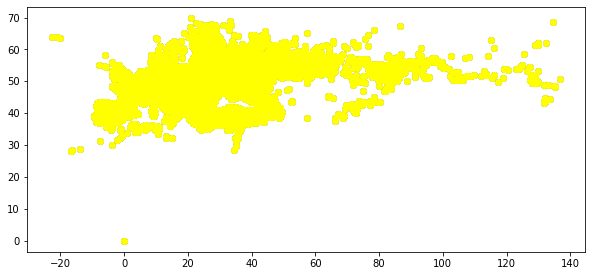

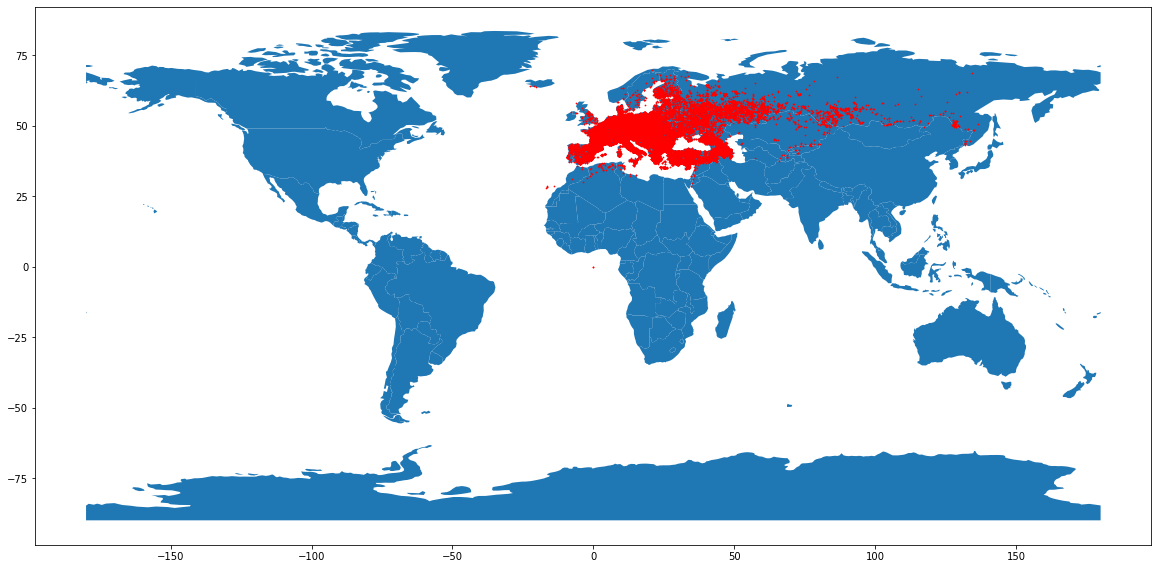

In [ ]:
# visulaisation des rapports sur carte
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   


ax = gdf.plot(figsize=(10,5), color="gray")
gdf.plot(figsize=(10,5), ax=ax, color="yellow")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=0.5)

In [ ]:
# valeurs non nulles par colonne
print(df.count().to_string())

In [ ]:
# convertire TIME-EVENT en format datetime
def convert_dt(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    return dt
df['TIME']=df.apply(lambda donnee: convert_dt(donnee), axis=1)

In [ ]:
#remplacer les données en string dans time accuracy et place accuracy en string (respectivement en minutes et mètres)
df=df.replace('1M','1')
df=df.replace('5M','5')
df=df.replace('15M','15')
df=df.replace('30M','30')
df=df.replace('1H','60')
df=df.replace('3H','180')
df=df.replace('6H','360')
df=df.replace('12H','720')
df=df.replace('GT1D','1440')
df=df.replace('1D','1440')
df=df.replace('HALF_MONTH','21600')
df=df.replace('1KM','1000')
df=df.replace('3KM','3000')
df=df.replace('5KM','5000')
df=df.replace('10KM','10000')
df=df.replace('20KM','20000')
df=df.replace('50KM','50000')
df=df.replace('100KM','100000')
df=df.replace('GT100KM','100000')
df['TIME_ACCURACY'] = df['TIME_ACCURACY'].fillna(0).astype(int)
df['PLACE_ACCURACY'] = df['PLACE_ACCURACY'].fillna(0).astype(int)

In [ ]:
# on maintient seulement les données nécessaires pour l'application du modèle 
df=df.loc[:,['LATITUDE','LONGITUDE','TIME_EVENT','COUNTRY','YEAR']]

In [ ]:
#export la dataframe pour pouvoir la réutiliser
df.to_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/bdd.csv")
